1. 파일 로드 & 전처리

In [1]:
cd drive/My Drive/NMT1

/content/drive/My Drive/NMT1


In [2]:
cd 형태소Json

/content/drive/My Drive/NMT1/형태소Json


In [3]:
import numpy as np
import pandas as pd
import json
import re

# json에서 형태소에 해당하는 부분만 남김
def preprocess_gloss(f):
  f = str(f)
  #print(f)
  f = re.sub(r'[^\w]','',f)
  f = re.sub(r'name',' ',f)
  f = re.sub(r'[a-zA-Z0-9_]','',f)
  f = re.sub(r'  ','',f)
  return f

# 테스트
with open("NIA_SL_SEN0060_REAL10_R_morpheme.json", "r", encoding="utf-8", errors='ignore') as f:
      f = json.load(f) 
      f = preprocess_gloss(f)

tmp_gloss = []
tmp_gloss.append(f)
tmp_gloss

['쿠폰 샀다']

In [4]:
# 형태소 json 데이터를 불러와서 str 형태로 data list에 넣기

gl = ["D"] #,"F","L","R","U"
gloss = []

for i in range(1,60): 
  i = str(i)
  for g in gl:
    with open("NIA_SL_SEN00" + i.zfill(2) + "_REAL06_"+ g + "_morpheme.json", "r", encoding="utf-8", errors='ignore') as f:
      f = json.load(f) 
      gloss.append(preprocess_gloss(f))

    with open("NIA_SL_SEN00" + i.zfill(2) + "_REAL10_"+ g + "_morpheme.json", "r", encoding="utf-8", errors='ignore') as f:
      f = json.load(f) 
      gloss.append(preprocess_gloss(f))


In [5]:
# data list 확인
gloss

['왼쪽',
 '왼쪽',
 '왼쪽',
 '왼쪽',
 '오른쪽',
 '오른쪽',
 '오른쪽',
 '오른쪽',
 '여기',
 '여기',
 '여기',
 '여기',
 '저기',
 '저기',
 '저기',
 '저기',
 '운전 느리다',
 '운전 느리다',
 '운전 느리다',
 '운전 느리다',
 '운전 빨리',
 '운전 빨리',
 '자동차 빨리',
 '자동차 빨리',
 '시간 급하다',
 '시간 급하다',
 '시간 급하다',
 '시간 급하다',
 '급하다',
 '급하다',
 '급하다',
 '급하다',
 '약속 늦다',
 '약속 늦다',
 '약속 늦다',
 '약속 늦다',
 '저',
 '저',
 '저',
 '저',
 '당신',
 '당신',
 '당신',
 '당신',
 '이거 사람',
 '이거 사람',
 '이거 사람',
 '이거 사람',
 '말 잘못',
 '말 잘못',
 '말 잘못',
 '말 잘못',
 '걱정',
 '걱정',
 '걱정',
 '걱정',
 '항상',
 '항상',
 '항상',
 '항상',
 '원래',
 '원래',
 '원래',
 '원래',
 '천',
 '천',
 '천',
 '천',
 '만원',
 '만원',
 '만원',
 '만원',
 '택시 기본 천원',
 '택시 기본 천원',
 '택시 기본 요금 얼마',
 '택시 기본 요금 얼마',
 '택시 기본 만원',
 '택시 기본 만원',
 '택시 기본 만원',
 '택시 기본 만원',
 '얼마 맞다 확인',
 '금액 얼마 맞다 확인',
 '얼마 맞다 확인',
 '금액 얼마 맞다 확인',
 '밤 시 이후 돈 추가',
 '밤 시 이후 돈 추가',
 '밤이후 돈 추가',
 '밤이후 돈 추가',
 '고속도로 요금내다',
 '고속도로 요금내다',
 '고속도로 요금내다',
 '고속도로 요금내다',
 '택시 현금 되다',
 '택시 현금 되다',
 '택시 현금 되다',
 '택시 현금 되다',
 '장애인 카드',
 '장애인 카드',
 '장애인 카드',
 '장애인 카드',
 '아동 교통 카드',
 '아동 교통 카드',
 '아동 교통 카드 되다'

In [6]:
gloss_=[]
gloss_.append(gloss[0])
gloss_.append(gloss[4])

In [7]:
gloss_

['왼쪽', '오른쪽']

In [8]:
# keypoint data도 동일하게 진행

In [70]:
cd ..

/content/drive/My Drive/NMT1


In [71]:
cd 키포인트Json

/content/drive/My Drive/NMT1/키포인트Json


In [75]:
# 영상 데이터는 여러 개이다보니 list 혹은 array 형태로 들어갈 수 밖에 없는데 그러면 학습이 안됨
# 따라서 일단 { } [ ] 을 각각 $ % ^ & 으로 replace 하여 train, predict를 진행하고 
# 후에 predict한 데이터를 다시 replace 하는 방법을 사용하기로 함

import os

# json에서 형태소에 해당하는 부분만 남김 {} [] => $ % ^ & => {} []
def preprocess_keypoints(f):
  f = str(f)
  #print(k)
  f = re.sub(r'{','',f)
  f = re.sub(r'}','',f)
  f = re.sub(r'\[','',f)
  f = re.sub(r']','',f)

  f = re.sub(r'$\'version\': 1.3, \'people\': ^$\'person_id\': ^-1&, \'pose_keypoints_2d\': ^', '',f)
  f = re.sub(r'\'face_keypoints_2d\': ^', '\t', f)
  f = re.sub(r'\'hand_left_keypoints_2d\': ^', '\t', f)
  f = re.sub(r'\'hand_right_keypoints_2d\': ^', '\t', f)
  f = re.sub(r'\'pose_keypoints_3d\': ^&, \'face_keypoints_3d\': ^&, \'hand_left_keypoints_3d\': ^&, \'hand_right_keypoints_3d\': ^&%&%\"', '',f)

  f = re.sub(r'\'version\': 1.3, \'people\': \'person_id\': -1, \'pose_keypoints_2d\': ', '',f)
  f = re.sub(r'\'face_keypoints_2d\': ', '\t', f)
  f = re.sub(r'\'hand_left_keypoints_2d\': ', '\t', f)
  f = re.sub(r'\'hand_right_keypoints_2d\': ', '\t', f)
  f = re.sub(r'\'pose_keypoints_3d\': , \'face_keypoints_3d\': , \'hand_left_keypoints_3d\': , \'hand_right_keypoints_3d\': ', '',f)
  
  return f

# 테스트

tmp_sign = []

for i in range (165):
  i = str(i)
  path2 = "NIA_SL_SEN0001_REAL06_D.mp4/NIA_SL_SEN0001_REAL06_D_000000000"+ i.zfill(3) +"_keypoints.json"
  with open(path2, "r", encoding="utf-8", errors='ignore') as f:
      f = json.load(f) 
      f = preprocess_keypoints(f)
      tmp_sign.append(f)

tmp_sign

# '왼쪽' 의 수어 영상 키포인트 시퀀스 (이게 하나의 영상 데이터임)

['998.832, 157.51, 0.854945, 989.572, 421.165, 0.749706, 801.079, 433.757, 0.603954, 735.22, 684.835, 0.754338, 694.445, 907.789, 0.7251, 1187.25, 411.837, 0.673643, 1262.64, 666.131, 0.72062, 1265.67, 907.851, 0.763629, 976.935, 1045.96, 0.305161, 845.089, 1039.71, 0.228664, 0, 0, 0, 0, 0, 0, 1099.35, 1077.35, 0.229298, 0, 0, 0, 0, 0, 0, 961.261, 135.65, 0.940718, 1036.56, 135.598, 0.909329, 892.241, 213.997, 0.909052, 1089.88, 210.912, 0.898652, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, \t898.986, 181.253, 0.453133, 900.026, 198.944, 0.544969, 903.148, 217.675, 0.534232, 909.392, 235.366, 0.643137, 923.961, 248.894, 0.690462, 941.652, 257.219, 0.669819, 963.505, 259.3, 0.680322, 982.237, 263.463, 0.701007, 1006.17, 265.544, 0.699582, 1022.82, 264.503, 0.679377, 1040.51, 259.3, 0.535766, 1056.12, 255.138, 0.44667, 1066.53, 249.935, 0.448658, 1073.81, 239.528, 0.486885, 1081.1, 226, 0.513223, 1082.14, 208.309, 0.601592, 1081.1, 184.375, 0.644473, 931.245, 125.059, 0.796466,

In [76]:
sl = ["D"] #,"F","L","R","U"
sign=[]


i_ = [str(1), str(3)]
for i in i_:
#for i in range(59): 
  for s in sl:
    
    i = str(i)
    folder = "NIA_SL_SEN00" + i.zfill(2) + "_REAL06_"+ s + ".mp4"
    file_list = os.listdir(folder)
    file_list.sort()
    
    sign_list = []
    for file in file_list:
      with open ("NIA_SL_SEN00" + i.zfill(2) + "_REAL06_"+ s + ".mp4/"+ file, "r", encoding="utf-8", errors='ignore') as f:    
        f = json.load(f) 
        sign_list.append(preprocess_keypoints(f))

    sign_list = str(sign_list)
    sign.append(sign_list)


    
    #with open ("NIA_SL_SEN00" + k.zfill(2) + "_REAL06_"+ s + ".mp4"
    #      + "/NIA_SL_SEN00"+ k.zfill(2) +"_REAL06_"+ s +"_000000000"+ j.zfill(3) +"_keypoints.json", 
    #      "r", encoding="utf-8", errors='ignore') as f:
    #      f = json.load(f) 
    #      sign.append(preprocess_keypoints(f))

    #with open("NIA_SL_SEN00" + i.zfill(2) + "_REAL10_"+ s + ".mp4"
    #    + "/NIA_SL_SEN00"+ i.zfill(2) +"_REAL10_"+ s +"_000000000"+ j.zfill(3) +"_keypoints.json", 
    #    "r", encoding="utf-8", errors='ignore') as f: 
    #    f = json.load(f) 
    #    sign.append(preprocess_keypoints(f))

keypoint 데이터에서 숫자만 남기고 다 지움, face, right hand, left hand 끼리 구분은 \t으로 했음


일단 우리는 키포인트로 학습이 되냐 안되냐가 중요한 거니까 

왼쪽의 첫줄, 오른쪽의 첫줄만 가져와서 학습시킬 수 있는지, 잘 나오는지 시도해보고자 함

이게 되는 게 확인되면 여러 데이터도 넣으려고 했는데... 했는데...  

In [13]:
sign

["['998.832, 157.51, 0.854945, 989.572, 421.165, 0.749706, 801.079, 433.757, 0.603954, 735.22, 684.835, 0.754338, 694.445, 907.789, 0.7251, 1187.25, 411.837, 0.673643, 1262.64, 666.131, 0.72062, 1265.67, 907.851, 0.763629, 976.935, 1045.96, 0.305161, 845.089, 1039.71, 0.228664, 0, 0, 0, 0, 0, 0, 1099.35, 1077.35, 0.229298, 0, 0, 0, 0, 0, 0, 961.261, 135.65, 0.940718, 1036.56, 135.598, 0.909329, 892.241, 213.997, 0.909052, 1089.88, 210.912, 0.898652, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, \\t898.986, 181.253, 0.453133, 900.026, 198.944, 0.544969, 903.148, 217.675, 0.534232, 909.392, 235.366, 0.643137, 923.961, 248.894, 0.690462, 941.652, 257.219, 0.669819, 963.505, 259.3, 0.680322, 982.237, 263.463, 0.701007, 1006.17, 265.544, 0.699582, 1022.82, 264.503, 0.679377, 1040.51, 259.3, 0.535766, 1056.12, 255.138, 0.44667, 1066.53, 249.935, 0.448658, 1073.81, 239.528, 0.486885, 1081.1, 226, 0.513223, 1082.14, 208.309, 0.601592, 1081.1, 184.375, 0.644473, 931.245, 125.059, 0.7964

In [14]:
X = pd.DataFrame(gloss_)
X

,0
0,왼쪽
1,오른쪽


In [15]:
y = pd.DataFrame(sign)
y

,0
0,"['998.832, 157.51, 0.854945, 989.572, 421.165,..."
1,"['992.628, 157.515, 0.892708, 992.482, 421.195..."


In [16]:
X = X[0].values
X

array(['왼쪽', '오른쪽'], dtype=object)

In [17]:
y = y[0].values
y

array(["['998.832, 157.51, 0.854945, 989.572, 421.165, 0.749706, 801.079, 433.757, 0.603954, 735.22, 684.835, 0.754338, 694.445, 907.789, 0.7251, 1187.25, 411.837, 0.673643, 1262.64, 666.131, 0.72062, 1265.67, 907.851, 0.763629, 976.935, 1045.96, 0.305161, 845.089, 1039.71, 0.228664, 0, 0, 0, 0, 0, 0, 1099.35, 1077.35, 0.229298, 0, 0, 0, 0, 0, 0, 961.261, 135.65, 0.940718, 1036.56, 135.598, 0.909329, 892.241, 213.997, 0.909052, 1089.88, 210.912, 0.898652, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, \\t898.986, 181.253, 0.453133, 900.026, 198.944, 0.544969, 903.148, 217.675, 0.534232, 909.392, 235.366, 0.643137, 923.961, 248.894, 0.690462, 941.652, 257.219, 0.669819, 963.505, 259.3, 0.680322, 982.237, 263.463, 0.701007, 1006.17, 265.544, 0.699582, 1022.82, 264.503, 0.679377, 1040.51, 259.3, 0.535766, 1056.12, 255.138, 0.44667, 1066.53, 249.935, 0.448658, 1073.81, 239.528, 0.486885, 1081.1, 226, 0.513223, 1082.14, 208.309, 0.601592, 1081.1, 184.375, 0.644473, 931.245, 125.059, 

2.토크나이징

 https://towardsdatascience.com/neural-machine-translation-nmt-with-attention-mechanism-5e59b57bd2ac

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
import string
from string import digits
import re
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM, Input, Dense,Embedding, Concatenate, TimeDistributed
from tensorflow.keras.models import Model,load_model, model_from_json
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.callbacks import EarlyStopping
import pickle as pkl
import numpy as np


In [19]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.5)

In [20]:
def Max_length(data):
  max_length_ = max([len(x.split(' ')) for x in data])
  return max_length_

#Training data
max_X = Max_length(X_train)

#Test data
max_X_test = Max_length(X_test)

max_X, max_X_test

(1, 1)

In [21]:
Tok = Tokenizer()
Tok.fit_on_texts(X_train)
word2index = Tok.word_index
vocab_size_source = len(word2index) + 1

X_train = Tok.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=max_X, padding='post')
X_test = Tok.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=max_X, padding='post')

In [38]:
word2index

{'왼쪽': 1}

In [ ]:
key2index 

In [22]:
max_y = len(y)
max_y_test = len(y)
vocab_size_target = len(y)

In [23]:
y_train

array(["['998.832, 157.51, 0.854945, 989.572, 421.165, 0.749706, 801.079, 433.757, 0.603954, 735.22, 684.835, 0.754338, 694.445, 907.789, 0.7251, 1187.25, 411.837, 0.673643, 1262.64, 666.131, 0.72062, 1265.67, 907.851, 0.763629, 976.935, 1045.96, 0.305161, 845.089, 1039.71, 0.228664, 0, 0, 0, 0, 0, 0, 1099.35, 1077.35, 0.229298, 0, 0, 0, 0, 0, 0, 961.261, 135.65, 0.940718, 1036.56, 135.598, 0.909329, 892.241, 213.997, 0.909052, 1089.88, 210.912, 0.898652, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, \\t898.986, 181.253, 0.453133, 900.026, 198.944, 0.544969, 903.148, 217.675, 0.534232, 909.392, 235.366, 0.643137, 923.961, 248.894, 0.690462, 941.652, 257.219, 0.669819, 963.505, 259.3, 0.680322, 982.237, 263.463, 0.701007, 1006.17, 265.544, 0.699582, 1022.82, 264.503, 0.679377, 1040.51, 259.3, 0.535766, 1056.12, 255.138, 0.44667, 1066.53, 249.935, 0.448658, 1073.81, 239.528, 0.486885, 1081.1, 226, 0.513223, 1082.14, 208.309, 0.601592, 1081.1, 184.375, 0.644473, 931.245, 125.059, 

3.넣었을 때 잘 돌아가나 확인...해봤는데 잘 안됨

키포인트 데이터 형태에 맞게 decoder의 input shape을 변경해줘야 되는데 아직 못했습니다... 계속 해보겠습니다

=================망함=================


1) 인코딩 - 디코딩 

https://towardsdatascience.com/neural-machine-translation-nmt-with-attention-mechanism-5e59b57bd2ac

In [42]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
latent_dim = 10

In [45]:
# Encoder 
encoder_inputs = Input(shape=(max_X,)) 
enc_emb = Embedding(vocab_size_source, latent_dim,trainable=True)(encoder_inputs)

#LSTM 1 
encoder_lstm = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_outputs, state_h, state_c = encoder_lstm1(enc_emb)

In [46]:
#Decoder
decoder_inputs = Input(shape=(None,)) 
dec_emb_layer = Embedding(vocab_size_target, latent_dim,trainable=True) 
dec_emb = dec_emb_layer(decoder_inputs)

#LSTM using encoder_states as initial state
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True) 
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

In [48]:
#https://github.com/thushv89/attention_keras/blob/master/src/layers/attention.py
import tensorflow as tf
import os
from tensorflow.python.keras.layers import Layer
from tensorflow.python.keras import backend as K


class AttentionLayer(Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs, verbose=False):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state
            inputs: (batchsize * 1 * de_in_dim)
            states: (batchsize * 1 * de_latent_dim)
            """

            assert_msg = "States must be an iterable. Got {} of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            """ Some parameters required for shaping tensors"""
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch size * en_seq_len * latent_dim
            W_a_dot_s = K.dot(encoder_out_seq, self.W_a)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>', U_a_dot_h.shape)

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            Ws_plus_Uh = K.tanh(W_a_dot_s + U_a_dot_h)
            if verbose:
                print('Ws+Uh>', Ws_plus_Uh.shape)

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.squeeze(K.dot(Ws_plus_Uh, self.V_a), axis=-1)
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """

            assert_msg = "States must be an iterable. Got {} of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        fake_state_c = K.sum(encoder_out_seq, axis=1)
        fake_state_e = K.sum(encoder_out_seq, axis=2)  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

In [49]:
#Attention Layer
attn_layer = AttentionLayer(name='attention_layer') 
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# Concat attention output and decoder LSTM output 
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

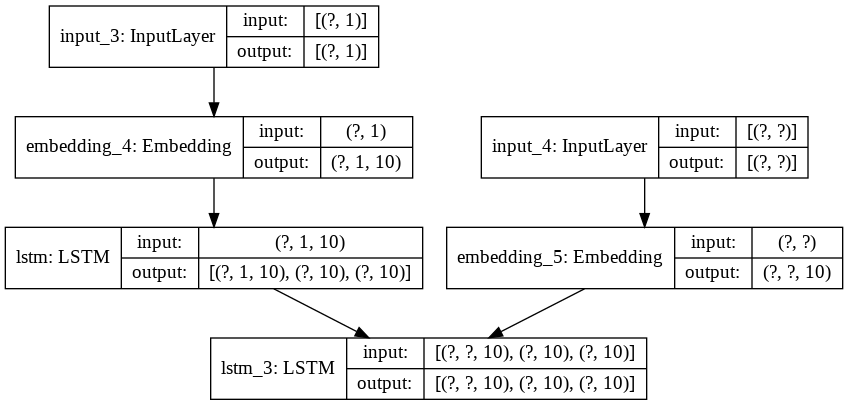

In [50]:
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
plot_model(model, to_file='train_model.png', show_shapes=True)

In [51]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [69]:
history = model.fit(X_train, y_train, 
                    epochs=5, 
                    batch_size=1,
                    validation_data = (X_test, y_test))

Epoch 1/5


AssertionError: ignored

2) 인코딩 - 디코딩 

https://www.tensorflow.org/tutorials/text/nmt_with_attention

In [24]:
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import re
import numpy as np
import os
import io
import time

In [25]:
class Encoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
    super(Encoder, self).__init__()
    self.batch_sz = batch_sz
    self.enc_units = enc_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.enc_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')

  def call(self, x, hidden):
    x = self.embedding(x)
    output, state = self.gru(x, initial_state = hidden)
    return output, state

  def initialize_hidden_state(self):
    return tf.zeros((self.batch_sz, self.enc_units))

In [26]:
num_examples = 2
embedding_dim = 4
units = 2
BATCH_SIZE=1

encoder = Encoder(vocab_size_source, embedding_dim, units, BATCH_SIZE)

# sample input
sample_hidden = encoder.initialize_hidden_state()
sample_output, sample_hidden = encoder(X_train, sample_hidden)
print ('Encoder output shape: (batch size, sequence length, units) {}'.format(sample_output.shape))
print ('Encoder Hidden state shape: (batch size, units) {}'.format(sample_hidden.shape))

Encoder output shape: (batch size, sequence length, units) (1, 1, 2)
Encoder Hidden state shape: (batch size, units) (1, 2)


In [27]:
class BahdanauAttention(tf.keras.layers.Layer):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, query, values):
    # query hidden state shape == (batch_size, hidden size)
    # query_with_time_axis shape == (batch_size, 1, hidden size)
    # values shape == (batch_size, max_len, hidden size)
    # we are doing this to broadcast addition along the time axis to calculate the score
    query_with_time_axis = tf.expand_dims(query, 1)

    # score shape == (batch_size, max_length, 1)
    # we get 1 at the last axis because we are applying score to self.V
    # the shape of the tensor before applying self.V is (batch_size, max_length, units)
    score = self.V(tf.nn.tanh(
        self.W1(query_with_time_axis) + self.W2(values)))

    # attention_weights shape == (batch_size, max_length, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [28]:
attention_layer = BahdanauAttention(10)
attention_result, attention_weights = attention_layer(sample_hidden, sample_output)

print("Attention result shape: (batch size, units) {}".format(attention_result.shape))
print("Attention weights shape: (batch_size, sequence_length, 1) {}".format(attention_weights.shape))

Attention result shape: (batch size, units) (1, 2)
Attention weights shape: (batch_size, sequence_length, 1) (1, 1, 1)


In [29]:
class Decoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
    super(Decoder, self).__init__()
    self.batch_sz = batch_sz
    self.dec_units = dec_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.dec_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
    self.fc = tf.keras.layers.Dense(vocab_size)

    # used for attention
    self.attention = BahdanauAttention(self.dec_units)

  def call(self, x, hidden, enc_output):
    # enc_output shape == (batch_size, max_length, hidden_size)
    context_vector, attention_weights = self.attention(hidden, enc_output)

    # x shape after passing through embedding == (batch_size, 1, embedding_dim)
    x = self.embedding(x)

    # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

    # passing the concatenated vector to the GRU
    output, state = self.gru(x)

    # output shape == (batch_size * 1, hidden_size)
    output = tf.reshape(output, (-1, output.shape[2]))

    # output shape == (batch_size, vocab)
    x = self.fc(output)

    return x, state, attention_weights

In [30]:
decoder = Decoder(vocab_size_target, embedding_dim, units, BATCH_SIZE)

sample_decoder_output, _, _ = decoder(tf.random.uniform((BATCH_SIZE, 1)),
                                      sample_hidden, sample_output)

print ('Decoder output shape: (batch_size, vocab size) {}'.format(sample_decoder_output.shape))

Decoder output shape: (batch_size, vocab size) (1, 2)


In [31]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)

In [39]:
@tf.function
def train_step(inp, targ, enc_hidden):
  loss = 0

  with tf.GradientTape() as tape:
    enc_output, enc_hidden = encoder(inp, enc_hidden)

    dec_hidden = enc_hidden

  # ★★★★★★★★ 여기를 우리 데이터에 맞게 바꾸어줘야함 ★★★★★★★★★
    dec_input = tf.expand_dims(1 * BATCH_SIZE, 1) 
    # 원래는 ([targ_lang.word_index['<start>']]* BATCH_SIZE, 1)
    # decoder input 차원을 맞춰줘야 되는데... 되는데...

    # Teacher forcing - feeding the target as the next input
    for t in range(1, targ.shape[1]):
      # passing enc_output to the decoder
      predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)

      loss += loss_function(targ[:, t], predictions)

      # using teacher forcing
      dec_input = tf.expand_dims(targ[:, t], 1)

  batch_loss = (loss / int(targ.shape[1]))

  variables = encoder.trainable_variables + decoder.trainable_variables

  gradients = tape.gradient(loss, variables)

  optimizer.apply_gradients(zip(gradients, variables))

  return batch_loss

In [33]:
steps_per_epoch = 1 #len(X_train)//BATCH_SIZE
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(2)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

In [40]:
EPOCHS = 10

for epoch in range(EPOCHS):
  start = time.time()

  enc_hidden = encoder.initialize_hidden_state()
  total_loss = 0

  for (batch, (X_train, y_train)) in enumerate(dataset.take(steps_per_epoch)):
    batch_loss = train_step(X_train, y_train, enc_hidden)
    total_loss += batch_loss

    if batch % 100 == 0:
      print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                   batch,
                                                   batch_loss.numpy()))
  # saving (checkpoint) the model every 2 epochs
  if (epoch + 1) % 2 == 0:
    checkpoint.save(file_prefix = checkpoint_prefix)

  print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                      total_loss / steps_per_epoch))
  print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

ValueError: ignored